# So like yeah this is an iPython notebook for the project

It's split into three parts:
- discretizing audio
- general mcmc for sampling from multivariate normal
- sample from audio
- see what happens

## Part 1: discretizing speech with short time fourier transform

Basically, speech is constant, but we can discretize it making it easy to analyze, while still having enough data to reconstruct it into audio. The goal is to discretize it, map it from our speech distribution to someone else's (both of which will require Metropolis-Hastings), and play it back in the other person's voice.

In [1]:
import IPython
IPython.display.Audio('marvin.wav')

In [2]:
IPython.display.Audio('marvin2.wav')

In [3]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib import cm
spec_kwargs = {'NFFT': 80, 'Fc':0, 'noverlap': 40, 'window':mlab.window_hanning, 'cmap':cm.gray_r}

Some data on the spoken word "marvin" for speaker 1: 
16000 samples, sampled at 16000 Hz


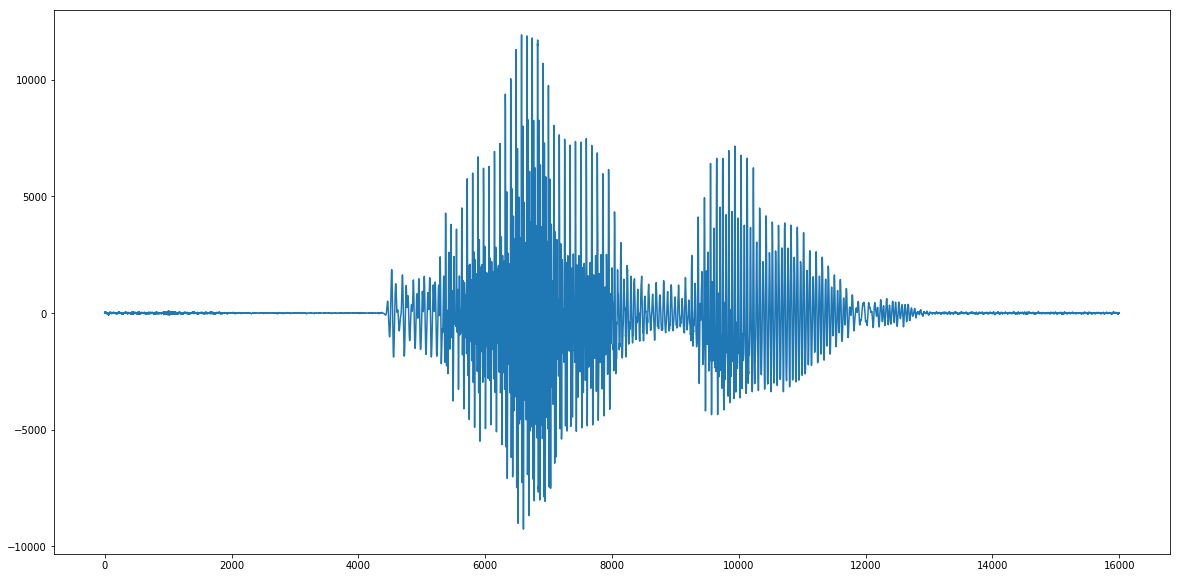

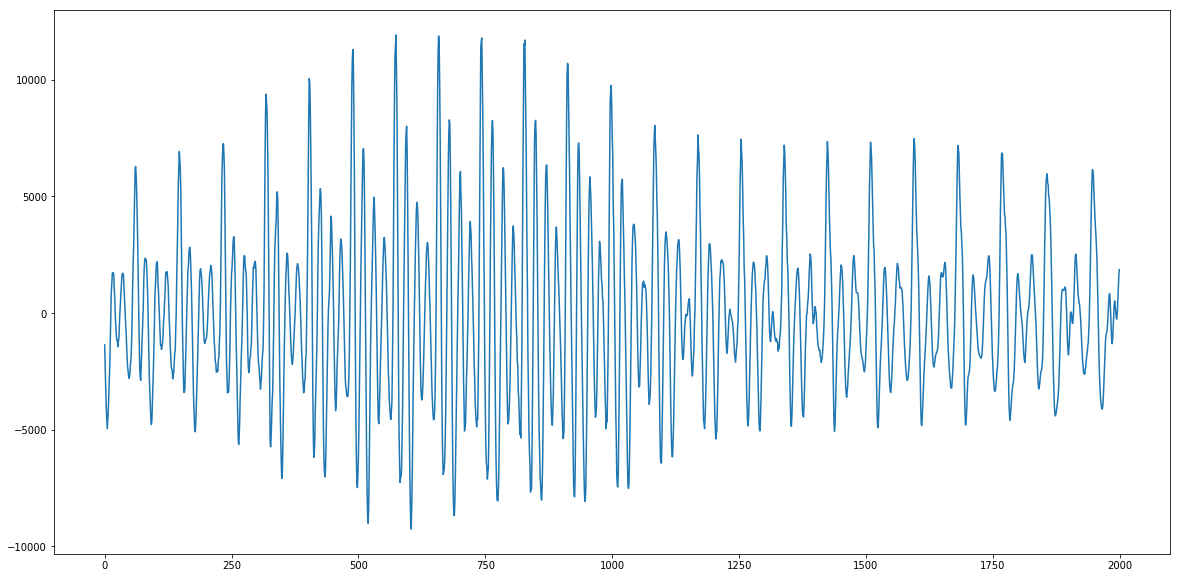

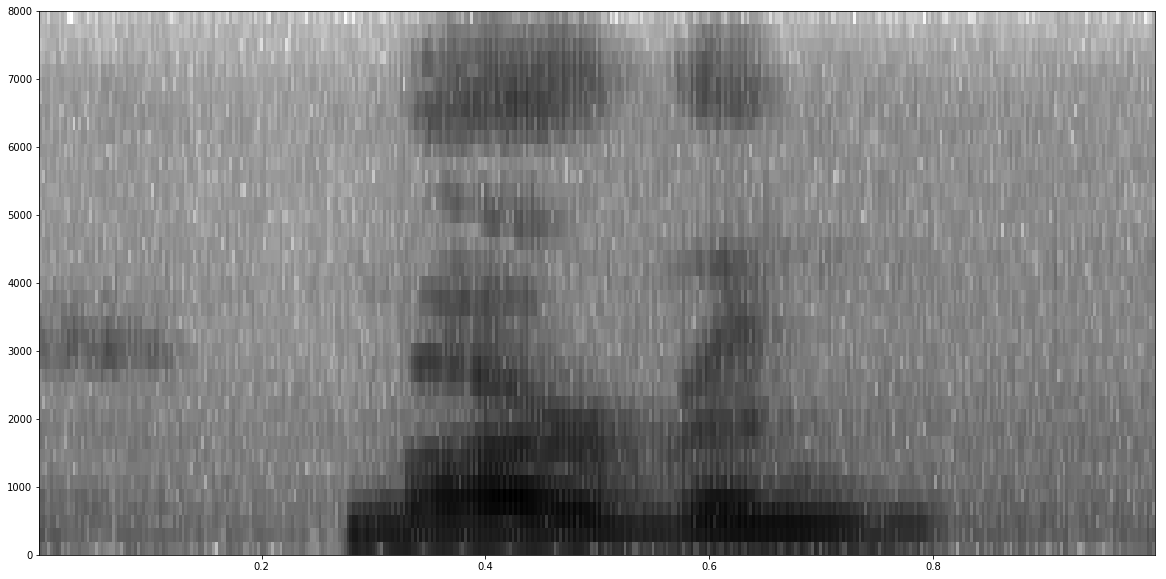

In [4]:
rate1, marvin1 = read('marvin.wav')
print('Some data on the spoken word "marvin" for speaker 1: ')
print(f'{marvin1.shape[0]} samples, sampled at {rate1} Hz')
plt.figure(figsize=(20,10))
plt.plot(marvin1)
plt.figure(figsize=(20,10))
plt.plot(marvin1[6000:8000])
plt.figure(figsize=(20,10))
_ = plt.specgram(marvin1, Fs=rate1, **spec_kwargs)

Alright, time to use my Ling 110 skills! Looking at the spectrogram, we can see general trends. The bar at the bottom is called the "voicing bar" and marks any voiced sound (think 'v' vs 'b'). All the sounds in the word "marvin" are usually voiced, so this is constant. We also see some lines moving up and down, like from 0.3 to 0.5 we see one line rising from 1500 Hz to 2000 Hz and one falling from 3000 Hz to 2000 Hz. These are the F1 and F2 formant frequencies, the important parts of a vowel sound.

for speaker 2: 
16000 samples, sampled at 16000 Hz


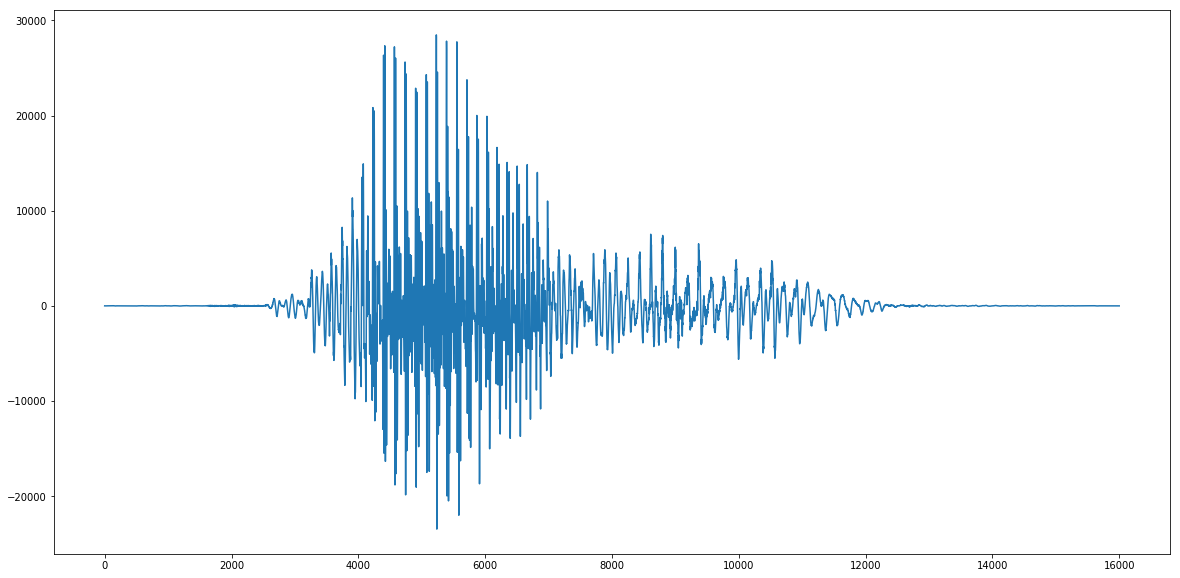

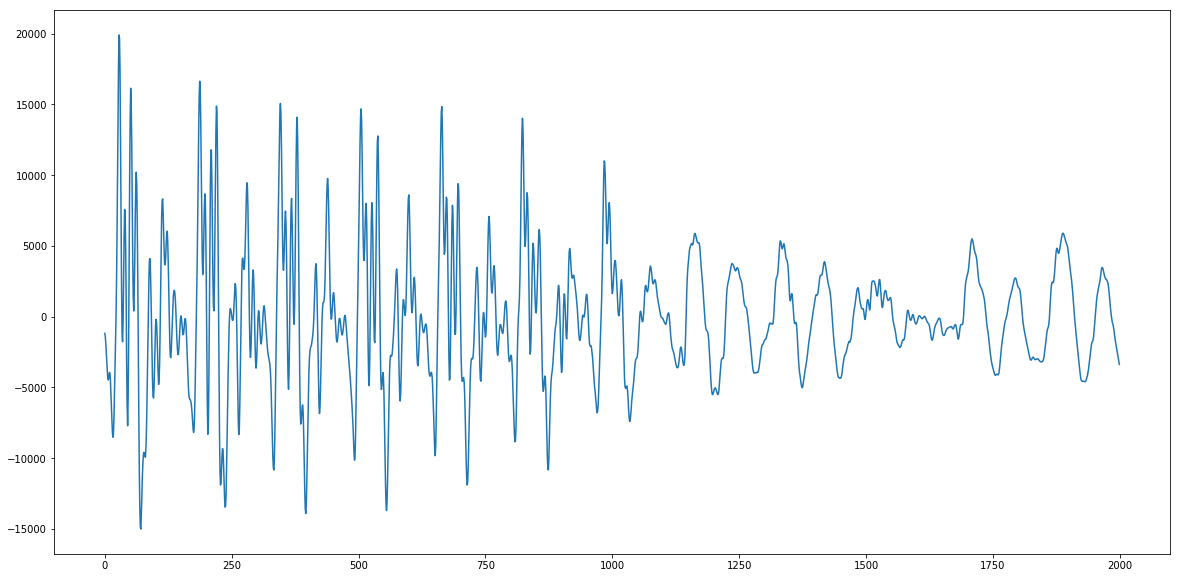

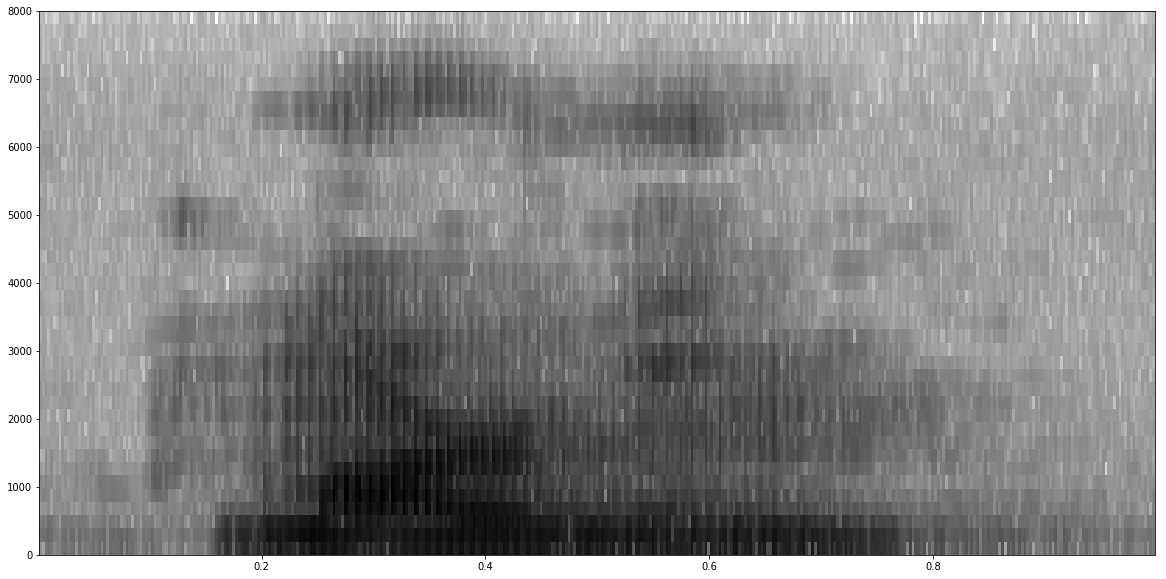

In [5]:
rate2, marvin2 = read('marvin2.wav')
print('for speaker 2: ')
print(f'{marvin2.shape[0]} samples, sampled at {rate2} Hz')
plt.figure(figsize=(20,10))
plt.plot(marvin2)
plt.figure(figsize=(20,10))
plt.plot(marvin2[6000:8000])
plt.figure(figsize=(20,10))
_ = plt.specgram(marvin2, Fs=rate2, **spec_kwargs)

Aaaand if you're not convinced that we can reproduce speech from this discretized, choppy looking data, here's the audio reconstructed from the same spectrogram for marvin1.

In [6]:
from scipy import signal
fft_kwargs = {'fs': rate1, 'nperseg': 80}
_, _, spectrum1 = signal.stft(marvin1, **fft_kwargs)
_, marvin_reconstructed = signal.istft(spectrum1, **fft_kwargs)
print(marvin_reconstructed)
IPython.display.Audio(data=marvin_reconstructed, rate=rate1)

[-0.99999905  2.999998   26.000002   ... 17.         25.999998
 18.        ]


In [9]:
print('The data is formatted like this')
freqs, t, spectrum2 = signal.stft(marvin2, **fft_kwargs)
spectrum2

The data is formatted like this


array([[-1.9215209e+00+0.j        ,  5.8500433e-01+0.j        ,
         7.4648283e-02+0.j        , ...,  3.9523485e+00+0.j        ,
        -2.7337587e+00+0.j        , -1.0163825e+00+0.j        ],
       [ 9.7861743e-01-1.2215611j , -1.5445137e-01+2.5721457j ,
         4.5054781e-01-2.9663837j , ..., -2.5420794e+00-2.3635895j ,
         2.0971644e+00+0.2837682j ,  6.9449735e-01+0.51826185j],
       [ 2.9153107e-02+0.7672135j , -1.9694109e-01-1.040205j  ,
        -6.3073438e-01+1.9814723j , ...,  5.6572121e-01+1.1971545j ,
        -1.2078674e+00-0.5159246j , -3.2794750e-01-0.53104395j],
       ...,
       [ 1.0660436e-03+0.00894868j, -6.4052746e-02+0.01112681j,
        -1.1641739e-02+0.01018343j, ...,  2.0191830e-03+0.05144135j,
         3.6148701e-02+0.064841j  ,  5.8642779e-02+0.01518602j],
       [-1.0566398e-02-0.01192866j,  4.4725362e-02-0.0081685j ,
        -1.5251542e-02-0.00499967j, ...,  2.0731898e-02-0.01295131j,
        -4.3243531e-02-0.04412475j, -4.2913835e-02-0.00460079j]